# Cross Validation

In [25]:
# imports for sklearn
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [27]:
# load diabetes data
from sklearn.datasets import load_diabetes

columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declare the columns names
diabetes = load_diabetes() # Call the diabetes dataset from sklearn
X = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

## Train and Test Split Only

In [29]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(331, 10) (331,)
(111, 10) (111,)


In [30]:
# fit your model using the training set
linear = LinearRegression()
linear.fit(X_train, y_train)

# call predict to get the predicted values for training and test set
train_predicted = linear.predict(X_train)
predictions = linear.predict(X_test)

Text(0,0.5,'Predictions')

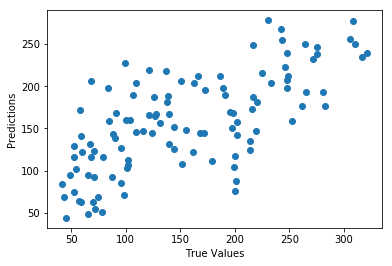

In [31]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [32]:
# print accuracy score
print("Score:", linear.score(X_test, y_test))

Score: 0.4733680928745609


In [33]:
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

In [34]:
# Perform 6-fold cross validation
scores = cross_val_score(linear, X, y, cv=6)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


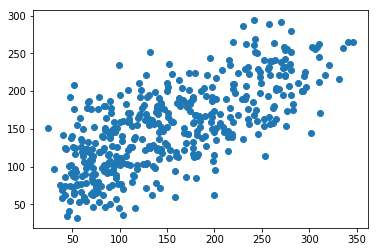

In [35]:
# Make cross validated predictions
predictions = cross_val_predict(linear, X, y, cv=6)
plt.scatter(y, predictions)

In [36]:
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.4908065838640774
